In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,make_scorer
from sklearn.datasets import load_breast_cancer

In [3]:
breast_x,breast_y=load_breast_cancer(return_X_y=True)
x=pd.DataFrame(breast_x)
y=pd.Series(breast_y).map({0:1,1:0})
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Percentage of the benign (0) and malign (1)
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
#Function returns the FNR given probabilities and the 
#Grand truth
def fnr(y_true,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_true,y_pred,labels=[0,1]).ravel()
    FNR=fn/(tp+fn)
    return FNR

In [6]:
fnr_score=make_scorer(fnr,greater_is_better=False,needs_proba=False)

In [7]:
#Random forests
rf_model=RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0,n_jobs=4)
#Hyperparameter space
rf_param_grid=dict(
n_estimators=[10,20,50,100,200,500,1000,2000],
max_depth=[1,2,3,4])
#Search
clf=GridSearchCV(rf_model,param_grid=rf_param_grid,scoring=fnr_score,cv=5)
search=clf.fit(x,y)
search.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [8]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.164563,0.068712
1,"{'max_depth': 1, 'n_estimators': 20}",-0.159801,0.073267
2,"{'max_depth': 1, 'n_estimators': 50}",-0.178627,0.068895
3,"{'max_depth': 1, 'n_estimators': 100}",-0.145404,0.085822
4,"{'max_depth': 1, 'n_estimators': 200}",-0.140642,0.082462


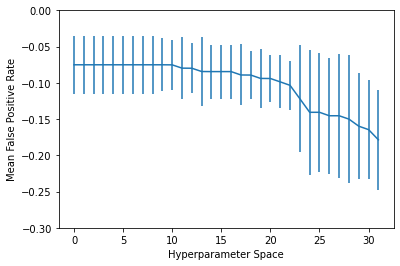

In [9]:
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylim(-0.3,0)
plt.ylabel('Mean False Positive Rate')
plt.xlabel("Hyperparameter Space")
plt.show()

In [10]:
#Scoring function that gives the probability
def fnr(y_true,y_pred):
    y_pred_class=np.where(y_pred>0.37,1,0)
    tn,fn,fp,tp=confusion_matrix(y_true,y_pred_class,labels=[0,1]).ravel()
    FNR=fn/(tp+fn)
    return FNR

In [11]:
fnr_score=make_scorer(
fnr,greater_is_better=False,needs_proba=True)

In [12]:
#Random forests
rf_model=RandomForestClassifier(n_estimators=100,max_depth=1,random_state=0,n_jobs=4)

#HYperpatrameter space
rf_param_grid=dict(
n_estimators=[10,20,50,100,200,500,1000,2000],
max_depth=[1,2,3,4])
#Search
clf=GridSearchCV(rf_model,param_grid=rf_param_grid,scoring=fnr_score,cv=5)
search=clf.fit(x,y)
print(search.best_params_)

{'max_depth': 4, 'n_estimators': 500}


In [13]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results.head()

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",-0.095545,0.051919
1,"{'max_depth': 1, 'n_estimators': 20}",-0.099802,0.038411
2,"{'max_depth': 1, 'n_estimators': 50}",-0.096353,0.026183
3,"{'max_depth': 1, 'n_estimators': 100}",-0.085694,0.025230
4,"{'max_depth': 1, 'n_estimators': 200}",-0.080368,0.025486


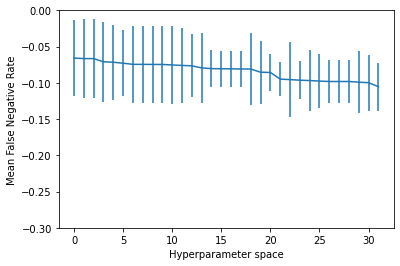

In [15]:
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylim(-0.3,0)
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter space')
plt.show()